In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/invstodata/HINDALCO_1D (1).xlsx - HINDALCO.csv
/kaggle/input/nifty50/NSEI.csv


In [2]:
file = pd.read_csv("/kaggle/input/invstodata/HINDALCO_1D (1).xlsx - HINDALCO.csv")
file.head()

,datetime,close,high,low,open,volume,instrument,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,NaN,NaN,NaN
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,NaN,NaN,NaN
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,NaN,NaN,NaN
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,NaN,NaN,NaN
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,NaN,NaN,NaN


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     1215 non-null   object 
 1   close        1215 non-null   float64
 2   high         1215 non-null   float64
 3   low          1215 non-null   float64
 4   open         1215 non-null   float64
 5   volume       1215 non-null   int64  
 6   instrument   1215 non-null   object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   3 non-null      float64
 9   Unnamed: 9   1 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  1 non-null      float64
dtypes: float64(9), int64(1), object(2)
memory usage: 114.0+ KB


In [4]:
# We need to clean the data of the NaN values
clean_data = file.drop(columns = ['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'])

In [5]:
clean_data.head()

,datetime,close,high,low,open,volume,instrument
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO


In [6]:
# We will use log returns since here we are interested in the temporal aspects of the returns 
# as per this article : https://medium.datadriveninvestor.com/when-is-log-transformation-necessary-for-financial-returns-4b3f5bb58e62
close_data = clean_data['close']
clean_data['log_return'] = np.log(close_data/close_data.shift())
print(clean_data['log_return'])

0            NaN
1      -0.025768
2       0.024012
3      -0.018178
4      -0.033208
          ...   
1210    0.000447
1211   -0.027839
1212    0.003437
1213    0.009108
1214    0.013060
Name: log_return, Length: 1215, dtype: float64


In [7]:
# to get rid of the NaN value
clean_data1 = clean_data.drop(0)
clean_data1.head()

,datetime,close,high,low,open,volume,instrument,log_return
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,-0.025768
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,0.024012
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,-0.018178
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,-0.033208
5,2014-01-31 00:00:00,109.55,110.00,107.00,109.05,8287236,HINDALCO,0.013324


<AxesSubplot:xlabel='Count', ylabel='log_return'>

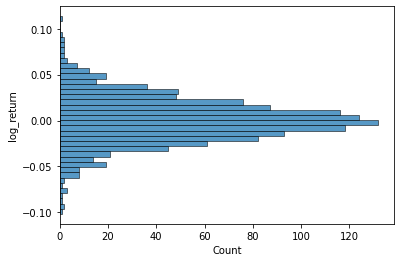

In [8]:
import seaborn as sns
%matplotlib inline
sns.histplot(data=clean_data1, y="log_return")

# we see that the returns are centred around 0 : less risky/volatile
# log returns are normally distributed

# Sharpe Ratio

In [9]:
sharpe_ratio = (clean_data1['log_return'].mean())/clean_data1['log_return'].std() 
# according to formulas given in the book
# the logged risk free rate of interest is being assumed to be 0 here 
# the average excess return is nothing but the average logged returns seen 
# the volatility is the standard deviation of the logged return
print(sharpe_ratio)
# This is the daily Sharpe ratio

0.022059848105174827


In [10]:
import math

math.exp(0.022059848105174827)
# Since sharpe ratio in the normal scale >1, we say that this is a good enough value for investment at the given level of log return

1.0223049656547363

# Information Ratio

In [11]:
# we make use of the NIFTY 50 logged returns as benchmark so we use that external dataset here
nifty = pd.read_csv("/kaggle/input/nifty50/NSEI.csv")
nifty.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609,14617.849609,455900
1,2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,14724.799805,467800
2,2021-05-07,14816.849609,14863.049805,14765.500000,14823.150391,14823.150391,488000
3,2021-05-10,14928.250000,14966.900391,14892.500000,14942.349609,14942.349609,522000
4,2021-05-11,14789.700195,14900.000000,14771.400391,14850.750000,14850.750000,647400


In [12]:
close_data = nifty['Close']
nifty['log_return'] = np.log(close_data/close_data.shift())
print(nifty['log_return'])

0           NaN
1      0.007290
2      0.006657
3      0.008009
4     -0.006149
         ...   
244    0.012056
245   -0.008298
246   -0.001958
247   -0.023203
248    0.000303
Name: log_return, Length: 249, dtype: float64


In [13]:
nifty1 = nifty.drop(0)
nifty1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,log_return
1,2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,14724.799805,467800,0.007290
2,2021-05-07,14816.849609,14863.049805,14765.500000,14823.150391,14823.150391,488000,0.006657
3,2021-05-10,14928.250000,14966.900391,14892.500000,14942.349609,14942.349609,522000,0.008009
4,2021-05-11,14789.700195,14900.000000,14771.400391,14850.750000,14850.750000,647400,-0.006149
5,2021-05-12,14823.549805,14824.049805,14649.700195,14696.500000,14696.500000,643800,-0.010441


In [14]:
# we define a function here to get the daily information ratio with the benchmark as NIFTY 50 
# logged returns in the same period
def information_ratio(returns, benchmark_returns):
 return_difference = returns - benchmark_returns
 volatility = return_difference.std() 
 information_ratio = return_difference.mean() / volatility
 return information_ratio

information_ratio(clean_data1['log_return'],nifty1['log_return'])

0.015206557670012137

In [15]:
import math

math.exp(0.015206557670012137)
# Since information ratio in the normal scale >1, we say that this is a good enough value for investment at the given level of log return

1.0153227656620791

In [16]:
# Sharpe Ratio at given level of log return : 1.0223049656547363
# Information Ratio at given level of log return : 1.0153227656620791